# EOF analysis, using a different package (```eofs```)

* As with many methods, there's different ways of computing the same operation. Here we'll introduce the eofs package developed by Andrew Dawson called eofs. 

* The nice thing about this package is that it is specifically developed for spatial-temporal data. It is also much simpler to use, as we will see. 

* Much of what is here was adapted from examples on the eofs website. For more information about the eofs package, you can visit the following website: https://ajdawson.github.io/eofs/index.html


In [1]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

The libraries above, we've already worked with. The one below is the new one. There are other ways of importing data for eofs (cdms and iris), but we'll be using the xarray option. 

In [2]:
from eofs.xarray import Eof

In [3]:
SSTanom_filename = '../data/HadISST_regridded_sstanom_195001-201412.nc' # data set of SST anomalies
ncfile2 = xr.open_dataset(SSTanom_filename)

In [4]:
sst_data_tropic_anom = ncfile2['anom'].sel(latitude=slice(-40,40))
sst_lat_tropic = ncfile2['latitude'].sel(latitude=slice(-40,40))
sst_lon_tropic = ncfile2['longitude']

In [5]:
## If we wanted to weight the analysis by area we will use the weights=wgt method. Otherwise, keep commented out.
#coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
#wgts = np.sqrt(coslat)[..., np.newaxis]
#solver = Eof(sst, weights=wgts)

solver = Eof(sst_data_tropic_anom,center=True,weights=None)

In [8]:
# Retrieve the 16 leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eofx = solver.eofsAsCorrelation(neofs=15)
pcx = solver.pcs(npcs=15, pcscaling=1)
eigenvaluesx = solver.varianceFraction(neigs=15)

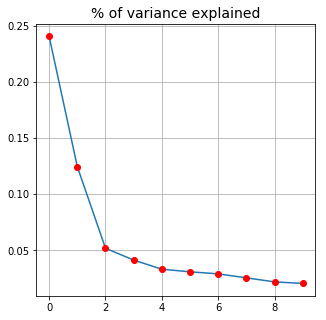

In [9]:
f, ax = plt.subplots(figsize=(5,5))
ax.plot(np.array(eigenvaluesx[0:10]))
ax.plot(np.array(eigenvaluesx[0:10]),'ro')
ax.set_title("% of variance explained", fontsize=14)
ax.grid()

Text(0.5, 1.0, 'EOF1 of Tropical SST from HadISST (1960-2014)')

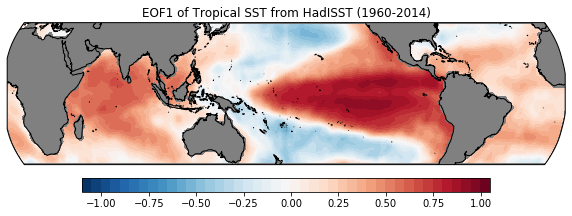

In [10]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180)
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'
ax.background_patch.set_facecolor('gray')

#3: add contour level information and plot
contour_levels = np.arange(-1.1,1.1,0.05)

contour_plot = ax.contourf(sst_lon_tropic, 
                           sst_lat_tropic, 
                           eofx[0],  
                           cmap='RdBu_r',
                           levels=contour_levels,
                           transform=data_crs)

ax.set_extent([0, 359, -40, 40], crs=cartopy.crs.PlateCarree())
#4: add final touches:  color bars, titles
cbar = fig.colorbar(contour_plot, orientation='horizontal', fraction=.05, aspect=30, pad=.05)
ax.set_title('EOF1 of Tropical SST from HadISST (1960-2014)')

Text(0.5, 1.0, 'EOF2 of Tropical SST from HadISST (1960-2014)')

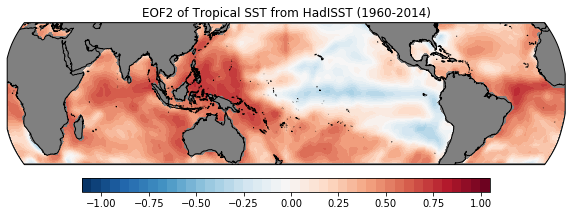

In [11]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180)
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'
ax.background_patch.set_facecolor('gray')

#3: add contour level information and plot
contour_levels = np.arange(-1.1,1.1,0.05)

contour_plot = ax.contourf(sst_lon_tropic, 
                           sst_lat_tropic, 
                           eofx[1],  
                           cmap='RdBu_r',
                           levels=contour_levels,
                           transform=data_crs)

ax.set_extent([0, 359, -40, 40], crs=cartopy.crs.PlateCarree())
#4: add final touches:  color bars, titles
cbar = fig.colorbar(contour_plot, orientation='horizontal', fraction=.05, aspect=30, pad=.05)
ax.set_title('EOF2 of Tropical SST from HadISST (1960-2014)')

Text(0.5, 1.0, 'EOF3 of Tropical SST from HadISST (1960-2014)')

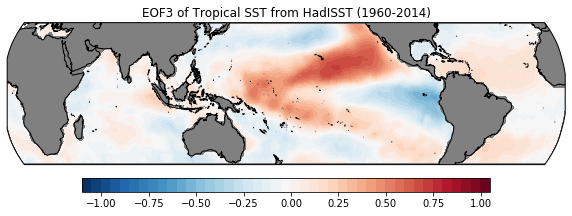

In [12]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180)
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'
ax.background_patch.set_facecolor('gray')

#3: add contour level information and plot
contour_levels = np.arange(-1.1,1.1,0.05)

contour_plot = ax.contourf(sst_lon_tropic, 
                           sst_lat_tropic, 
                           eofx[2],  
                           cmap='RdBu_r',
                           levels=contour_levels,
                           transform=data_crs)

ax.set_extent([0, 359, -40, 40], crs=cartopy.crs.PlateCarree())
#4: add final touches:  color bars, titles
cbar = fig.colorbar(contour_plot, orientation='horizontal', fraction=.05, aspect=30, pad=.05)
ax.set_title('EOF3 of Tropical SST from HadISST (1960-2014)')

Text(0.5, 1.0, 'PC1 Time Series')

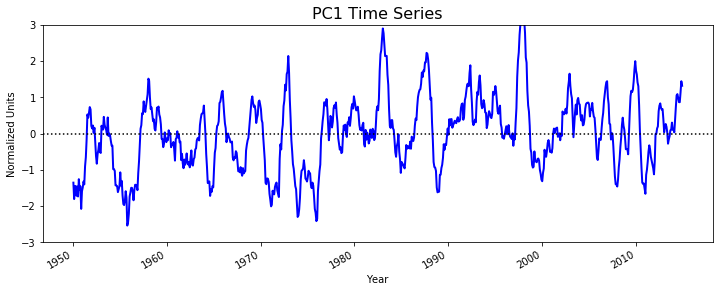

In [14]:
# Plot the leading PC time series.
plt.figure(figsize=(12,4))
pcx[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k',linestyle=':')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

Text(0.5, 1.0, 'PC2 Time Series')

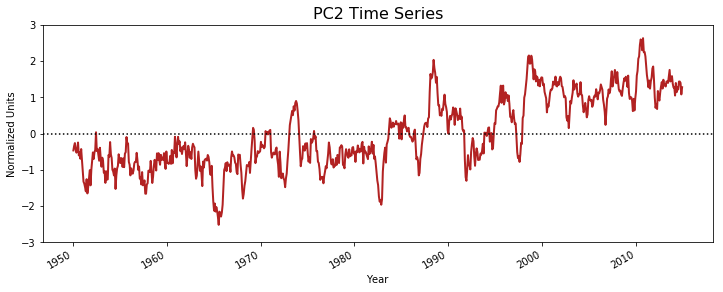

In [15]:
# Plot the leading PC time series.
plt.figure(figsize=(12,4))
pcx[:, 1].plot(color='firebrick', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k',linestyle=':')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC2 Time Series', fontsize=16)